In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#CONFIRMED
confirmed_df = pd.read_csv("Resources/time_series_19-covid-Confirmed.csv")
confirmed_df["Status"] = confirmed_df.loc[:,'Status'] = 'Confirmed'

#CREA UNA TABLA DE CASOS DIARIOS CONFIRMED
confirmedByday=confirmed_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        confirmedByday.iloc[j,i]=confirmedByday.iloc[j,i]-confirmedByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40


#MUERTES
deaths_df = pd.read_csv("Resources/time_series_19-covid-Deaths.csv")
deaths_df["Status"] = deaths_df.loc[:,'Status'] = 'Deaths'

#CREA UNA TABLA DE CASOS DIARIOS MUERTES
deathsByday=deaths_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        deathsByday.iloc[j,i]=deathsByday.iloc[j,i]-deathsByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

    
#RECOVERED    
recovered_df = pd.read_csv("Resources/time_series_19-covid-Recovered.csv")
recovered_df["Status"] = recovered_df.loc[:,'Status'] = 'Recovered'
#CREA UNA TABLA DE CASOS RECUPERADOS
recoveredByday=recovered_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        recoveredByday.iloc[j,i]=recoveredByday.iloc[j,i]-recoveredByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

## DATA ACUMULATIVAS
#  recovered_df
#  deaths_df
#  confirmed_df

## DATA DIARIAS
#  recoveredByday
#  deathsByday
#  confirmedByday

In [34]:
#Desde aquí se decide cuales df vamos a usar
combined_data = pd.concat([confirmed_df, deaths_df, recovered_df])
combined_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,Status
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,Confirmed
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,Confirmed
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,Confirmed
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,Confirmed
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,Confirmed


In [35]:
transposed_df = combined_data.melt(['Province/State', 'Country/Region', 'Lat', 'Long', 'Status'], var_name='Original Date', value_name='Cases')
transposed_df.head()

,Province/State,Country/Region,Lat,Long,Status,Original Date,Cases
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0


In [36]:
transposed_df['Date']  = pd.to_datetime(transposed_df['Original Date'])
transposed_df

,Province/State,Country/Region,Lat,Long,Status,Original Date,Cases,Date
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1,2020-01-22
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14,2020-01-22
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6,2020-01-22
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1,2020-01-22
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0,2020-01-22
...,...,...,...,...,...,...,...,...
11650,NaN,Romania,45.9432,24.9668,Recovered,2/27/20,0,2020-02-27
11651,NaN,Denmark,56.2639,9.5018,Recovered,2/27/20,0,2020-02-27
11652,NaN,Estonia,58.5953,25.0136,Recovered,2/27/20,0,2020-02-27
11653,NaN,Netherlands,52.1326,5.2913,Recovered,2/27/20,0,2020-02-27


In [113]:
grouped_df = transposed_df.groupby(['Status','Country/Region','Date'])

cases = grouped_df['Cases'].sum()

summary_df = pd.DataFrame({"Cases": cases})

summary_df = summary_df.reset_index()

china_df = summary_df.loc[(summary_df["Status"] == "Confirmed") & 
            (summary_df["Country/Region"] == "Mainland China"),:]

china_df['% Growth'] = china_df['Cases'].pct_change()


#row = rest of world
restofworld_filter_df = summary_df.loc[(summary_df["Status"] == "Confirmed") & 
                        (summary_df["Country/Region"] != "Mainland China"),:]

restofworld_grouped_df = restofworld_filter_df.groupby(['Status','Date'])

cases_row = restofworld_grouped_df['Cases'].sum()

restofworld_df = pd.DataFrame({"Cases": cases_row})

restofworld_df = restofworld_df.reset_index()

restofworld_confirmed = restofworld_df.loc[restofworld_df["Status"] == "Confirmed"]

restofworld_confirmed['% Growth'] = restofworld_df['Cases'].pct_change()

restofworld_confirmed


C:\Users\H314424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Status,Date,Cases,% Growth
0,Confirmed,2020-01-22,8,NaN
1,Confirmed,2020-01-23,14,0.750000
2,Confirmed,2020-01-24,25,0.785714
3,Confirmed,2020-01-25,35,0.400000
4,Confirmed,2020-01-26,56,0.600000
5,Confirmed,2020-01-27,64,0.142857
6,Confirmed,2020-01-28,84,0.312500
7,Confirmed,2020-01-29,96,0.142857
8,Confirmed,2020-01-30,110,0.145833
9,Confirmed,2020-01-31,144,0.309091


In [84]:
china_df

,Status,Country/Region,Date,Cases,% Growth
1036,Confirmed,Mainland China,2020-01-22,547,NaN
1037,Confirmed,Mainland China,2020-01-23,639,0.168190
1038,Confirmed,Mainland China,2020-01-24,916,0.433490
1039,Confirmed,Mainland China,2020-01-25,1399,0.527293
1040,Confirmed,Mainland China,2020-01-26,2062,0.473910
1041,Confirmed,Mainland China,2020-01-27,2863,0.388458
1042,Confirmed,Mainland China,2020-01-28,5494,0.918966
1043,Confirmed,Mainland China,2020-01-29,6070,0.104842
1044,Confirmed,Mainland China,2020-01-30,8124,0.338386
1045,Confirmed,Mainland China,2020-01-31,9783,0.204210


C:\Users\H314424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000000000C396448> has a label of '_line0' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\H314424\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000000090AB2C8> has a label of '_line1' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


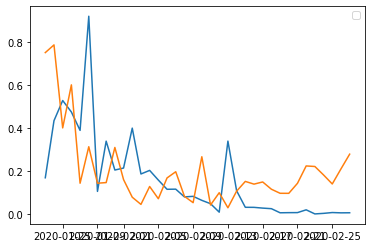

In [115]:
china_handle, = plt.plot(china_df['Date'],china_df['% Growth'])
restofworld_handle, = plt.plot(restofworld_confirmed['Date'],restofworld_confirmed['% Growth'])
plt.legend(handles=[china_handle, restofworld_handle], loc="best")